# Model Analysis Project

In this project we analyse the Solow model. We want to examine how a higher labor supply will affect the level of productivity. Thus we extend the Solow model with $\lambda$ which indicades the fraction of the population in the labor force. 

Furthermore, we adjust the model such that the level of technology increases within every period, and we analyse how this will affect the economy and the level of productivity. 

Import and set magics:

In [344]:
import numpy as np
from scipy import optimize
import sympy as sm

from IPython.display import display

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('seaborn-whitegrid')
plt.rcParams.update({'font.size': 12})

%matplotlib inline
import matplotlib.pyplot as plt # baseline modul
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') # whitegrid nice with 3d

# The Solow model with labor supply

We consider the Solow model with an adjustable supply of labor. The model consists of the following equations:

$$Y_t = BK_t^{\alpha}L_t^{1-\alpha}, 0<\alpha<1$$
$$S_t = sY_t, 0 < s < 1$$
$$K_{t+1}-K_t = S_t\delta K_t, 0<\delta<1$$

where $K_t$ is capital today, $K_{t+1}$ is capital tomorrow, $S_t$ is savings and $Y_t$ is the output of the economy. 

We also have $L_t$ which is the supply of labor, and $N_t$ which is the size of the population today, which are defined by the following:

$$L_t=\lambda N_t, 0<\lambda<1$$
$$N_{t+1}=(1+n)N_t$$

where lambda is the share of the population in work. The population is growing with a constant rate of $n$ in every period. 

We consider capital, labor and output pr. capita (not pr. worker):

$$y_t = \frac{Y_t}{N_t} = \lambda^{(1-\alpha)}Bk_t^{\alpha}$$ with $$k_t = \frac{K_t}{N_t}$$

This will give us the following transformation equation of capital: 

$$k_{t+1} = \frac{1}{(1+n)}(sB\lambda^{1-\alpha}k_t^{\alpha}+(1-\delta)k_t)$$


## Solving the model

The first step in solving the model is to find steady state of capital. This means solving for $k_t = k_{t+1} = k^{*}$

First we define all of the necessary symbols and equations of our model:

In [345]:
k = sm.symbols('k')
n = sm.symbols('n')
s = sm.symbols('s')
B = sm.symbols('B')
lam = sm.symbols('lambda')
delta = sm.symbols('delta')
alpha = sm.symbols('alpha')

steadystateK = sm.Eq(k,(s*B*lam**(1-alpha)*k**(alpha)+(1-delta)*k)/((1+n)))

We solve this using sympy: 

In [346]:
steadystateKstar = sm.solve(steadystateK,k)[0]
steadystateKstar

(B*lambda**(1 - alpha)*s/(delta + n))**(-1/(alpha - 1))

We see that the level of capital in steady state is positively dependent of the savings $s$, $B$ and the share of the population that is working. The level of capital in steady state is negatively dependent of the growth in population as well as the rate of attrition of capital $\delta$, with the condition of stability of $\delta+n>0$.

We also want to find the steady state of the output of the economy $y^{*}$.
We know that $y_t = \lambda^{(1-\alpha)}Bk_t^{\alpha}$.
To solve for $y^{*}$ we need to insert $k^{*}$ into the equation. 

In [347]:
#saving the steady state for k
ssk = sm.lambdify((B,lam,alpha,delta,n,s),steadystateKstar)

y = sm.symbols('y')
steadystateY = sm.Eq(y,lam**(1-alpha)*B*steadystateKstar**alpha)
steadystateYstar = sm.solve(steadystateY,y)[0]
steadystateYstar

B*lambda**(1 - alpha)*((B*lambda**(1 - alpha)*s/(delta + n))**(-1/(alpha - 1)))**alpha

We note that output is positively dependent of the same parameters as capital.

### How will the supply of labor affect the output of the economy? (Theoretically)

To show how the supply of labor affects the output in steady state we need to take a look at lambda - the share of population in work. First we look at the elasticity of lambda. To do this we need to rewrite the steady state for $y^{*}$: 

$$y^{*} = B\lambda^{(1-\alpha)}(\frac{B\lambda^{(1-\alpha)}s}{(\delta + n)})^{\frac{\alpha}{(1-\alpha)}}$$

$$y^{*} = \frac{B\lambda^{(1-\alpha)}B^{\frac{\alpha}{(1-\alpha)}}\lambda^{\alpha}s^{\frac{\alpha}{(1-\alpha)}}}{(\delta + n)^\frac{\alpha}{{(1-\alpha)}}}$$

$$y^{*} = \frac{B^{\frac{1}{(1-\alpha)}}\lambda s^{\frac{\alpha}{(1-\alpha)}}}{(\delta + n)^\frac{\alpha}{{(1-\alpha)}}}$$

$$y^{*} = B^{\frac{1}{(1-\alpha)}}\lambda(\frac{s}{(\delta + n)})^{\frac{\alpha}{(1-\alpha)}}$$

In [348]:
ely = sm.Eq(y,B**(1/(1-alpha))*lam*(s/(delta+n))**(alpha/(1-alpha)))
ely

Eq(y, B**(1/(1 - alpha))*lambda*(s/(delta + n))**(alpha/(1 - alpha)))

To find the elasticity of $y^{*}$ with respect to lambda we take the log on both sides: 

$$ln(y^{*}) = \frac{1}{1-\alpha}ln(B) + ln(\lambda) + \frac{\alpha}{1-\alpha}(ln(s) - ln(n+\delta)) $$

We also find the elasticity of $y^{*}$ with respect to lambda with sympy:

In [349]:
y_eq = B**(1/(1-alpha))*lam*(s/(delta+n))**(alpha/(1-alpha))

print(f'The elasticity is {sm.diff(y_eq,lam)*lam/y_eq}')

The elasticity is 1


We find that the elasticity of $y^{*}$ with respect to lambda is 1. This means that an increase in $\lambda$ with 1 pct. will result in an increase in $y^{*}$ with 1 pct. 

### How will the supply of labor affect the output of the economy? (Example)

To give an example of what the outcome of the steady state could be, we have tried to insert plausible values of the parameters. To see the effect of an increase in lambda, we have calculated the steady state value of capital two times given a share of workers being 0.6 and 0.75 which leads to the following two results:

In [350]:
print(f'The first solution with lampda = 0.6 is: {ssk(1,0.6,1/3,0.1,0.25,0.2):.3f}')
print(f'The second solution with lampda = 0.75 is: {ssk(1,0.75,1/3,0.1,0.25,0.2):.3f}')

The first solution with lampda = 0.6 is: 0.259
The second solution with lampda = 0.75 is: 0.324


As expected we get a higher level of capital the higher the share of workers relative to the population. We will illustrate this relationship between $y^{*}$ and $\lambda$: 

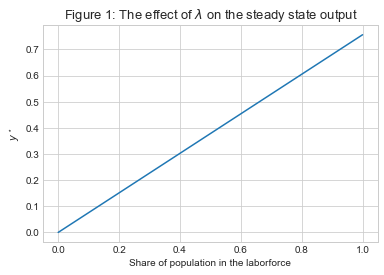

In [369]:
alpha=1/3
delta=0.1
g=0.02
n=0.25
s=0.2
B=1
lam_plot = np.linspace(0,1,100)
yss_plot = (B**(1/(1-alpha))*lam_plot*(s/(delta+n))**(alpha/(1-alpha)))

#Plotting different value of lambda from 0 to 1 against the value of tecnolegy adjusted capital steady state
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Share of population in the laborforce")
ax.set_ylabel("$y^\star$")

ax.set_title('Figure 1: The effect of $\lambda$ on the steady state output', fontsize=13)
ax.plot(lam_plot,yss_plot)
plt.show;

From this we clearly see the 1:1 relationship between an incease in $\lambda$ and the output pr. capita of the economy in steady state. Outside of steady state the relationship between the share of the population in the labor force ($\lambda$) and the output will be different. 
The output (outside ss) in the economy in pr. capita is: 
$y_t = \lambda^{(1-\alpha)}Bk_t^{\alpha}$

We calculate the elasticity of $y_t$ with respect to $\lambda$ with sympy:

In [352]:
y_t = B*lam**(1-alpha)*k**(alpha)

print(f'The elasticity is {sm.diff(y_t,lam)*lam/y_t}')

The elasticity is 0.666666666666667


This means that an increase in $\lambda$ by 1 pct. will result in an increase in $y^{*}$ with 0.667 pct. The elasticity is now smaller than in steady state, since some of the production will be used as savings in the capital. 

## Visualization of the two solutions

### The transition to steady state in a phase diagram

We want to show the transition to steady state in a phase diagram with the two different share of workers. We do this by simulating two different transations from time 0 to steady state.

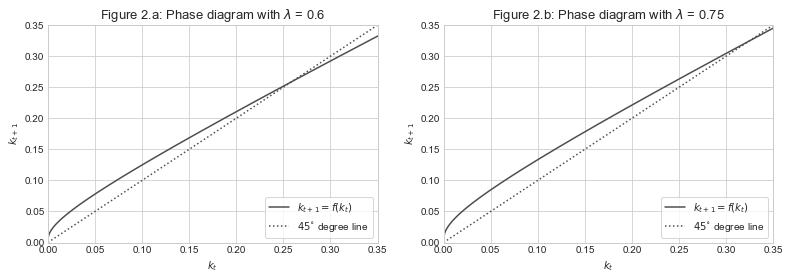

In [368]:
#Transformation equation of capital
def k_trans(alpha,delta,lam,B,s,n,k_t): 
    return 1/(1+n)*(s*B*lam**(1-alpha)*k_t**alpha+(1-delta)*k_t)

#Steady state for k
def ss_k(alpha,delta,lam,B,s,n):
    return (B*lam**(1-alpha)*s/(delta+n))**(1/(1-alpha))

# Setting the parameters
alpha=1/3
delta=0.1
lam_one=0.6
lam_two=0.75
B=1
n=0.25
s=0.2
k0 = 0.01

#Time periods
T = 20
index = range(T)
    
# Number of values in the grid
N = 1000

# Capital in period t
k_tone = np.linspace(0,0.4,N)
k_ttwo = np.linspace(0,0.4,N)

# Capital in period t+1
k_trans_one = np.zeros(N)
k_trans_two = np.zeros(N)

for i,k in enumerate(k_tone):
    k_trans_one[i] = k_trans(alpha,delta,lam_one,B,s,n,k)

for i,k in enumerate(k_ttwo):
    k_trans_two[i] = k_trans(alpha,delta,lam_two,B,s,n,k)
    
fig, axes = plt.subplots(1, 2, sharex='col', figsize=(13, 4))
ax1 = axes[0]
ax2 = axes[1]

#Phase diagram 1:

ax1.plot(k_tone,k_trans_one, color='0.3',label=r'$k_{t+1} = f(k_t)$')
ax1.plot(k_tone,k_tone,color='0.3',linestyle=':', label=r'$45^{\circ}$ degree line')

ax1.set_ylabel('$k_{t+1}$')
ax1.set_xlabel('$k_t$')
ax1.set_xlim(0,0.35)
ax1.set_ylim(0,0.35)
ax1.legend(loc=4,frameon=True)

ax1.set_title('Figure 2.a: Phase diagram with $\lambda$ = 0.6', fontsize=13)

#Phase diagram 2:

ax2.plot(k_ttwo,k_trans_two, color='0.3',label=r'$k_{t+1} = f(k_t)$')
ax2.plot(k_ttwo,k_ttwo,color='0.3',linestyle=':', label=r'$45^{\circ}$ degree line')

ax2.set_ylabel('$k_{t+1}$')
ax2.set_xlabel('$k_t$')
ax2.set_xlim(0,0.35)
ax2.set_ylim(0,0.35)
ax2.legend(loc=4,frameon=True)

ax2.set_title('Figure 2.b: Phase diagram with $\lambda$ = 0.75', fontsize=13)

plt.show()

In the two phase diagrams we see the transations from time 0 to steady state with two different values for $\lambda$. We clearly see that the steady state value of capital pr. capita is higher with a higher share of workers. An increase in $\lambda$ will not just benefit the economy temporarily but also in the long run.

### A simulation of convergence of capital to steady state

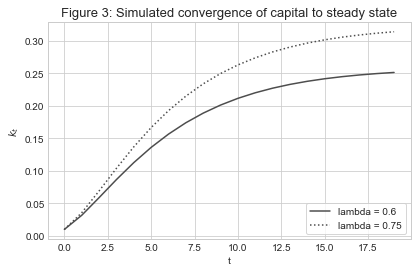

In [354]:
#Graph 3
k_level_one = np.zeros(len(index))
k_level_one[0] = k0

for t in index[1:]:
    k_level_one[t] = k_trans(alpha,delta,lam_one,B,s,n,k_level_one[t-1])

k_level_two = np.zeros(len(index))
k_level_two[0] = k0

for t in index[1:]:
    k_level_two[t] = k_trans(alpha,delta,lam_two,B,s,n,k_level_two[t-1])

fig, ax = plt.subplots(sharex='col', figsize=(6.5, 4))
ax.plot(k_level_one, color='0.3',label=r'lambda = 0.6')
ax.plot(k_level_two,color='0.3',linestyle=':', label=r'lambda = 0.75')
ax.set_ylabel('$k_{t}$')
ax.set_xlabel('t')
ax.legend(loc=4,frameon=True)

ax.set_title('Figure 3: Simulated convergence of capital to steady state', fontsize=13)

plt.show()

Figure 3 illustrates how capital converges to steady state with $\lambda$ being 0.6 and 0.75. Not only is the steady state level of $\lambda = 0.75$ higher, the level of capital in this economy is also higher during the time it converges to steady state. We see that in $t = 15$ the level of capital with $\lambda = 0.75$ is approximately 0.06 larger than the level of capital with $\lambda = 0.6$. 

# The Solow model with labor supply and exogeneous technological progress

Instead of a fixed level of technology we now consider an economy with growing technology. The level of technology increases in every period beacuse of more R&D. The model changes such that 

$$Y_t = K_t^{\alpha}(A_tL_t)^{1-\alpha}, 0<\alpha<1$$
$$A_{t+1}=(1+g)A_t$$

We note that the level of technology increases by $g$ in every period. Other than this the model is the same as earlier.

Now we consider technologically adjusted capital, labor and output pr. capita:

$$\tilde{y}_t = \frac{Y_t}{A_tN_t} = \lambda^{(1-\alpha)}\tilde{k}_t^{\alpha}$$ with $$\tilde{k}_t = \frac{K_t}{A_tN_t}$$

This gives us the following transformation equation of capital: 

$$\tilde{k}_{t+1} = \frac{1}{(1+n)(1+g)}(s\lambda^{1-\alpha}\tilde{k}_t^{\alpha}+(1-\delta)\tilde{k}_t)$$

## Solving the model analytically

The analytic solution of steady state of capital is solved: 

In [355]:
k = sm.symbols('k')
n = sm.symbols('n')
s = sm.symbols('s')
lam = sm.symbols('lambda')
delta = sm.symbols('delta')
alpha = sm.symbols('alpha')
g = sm.symbols('g')

steadystateK_tilde = sm.Eq(k,(s*lam**(1-alpha)*k**(alpha)+(1-delta)*k)/((1+n)*(1+g)))

In [356]:
kss = sm.solve(steadystateK_tilde,k)[0]
kss

(lambda**(1 - alpha)*s/(delta + g*n + g + n))**(-1/(alpha - 1))

## Solving the model numerically

The numerical solution of steady state of capital is solved: 

In [357]:
# Setting the parameters again
alpha=1/3
delta=0.1
lam_one=0.6
lam_two=0.75
g=0.02
n=0.25
s=0.2

In [367]:
def solver(lam,s,g,n,alpha,delta):
    func = lambda k: k**alpha
    k_tilde_func = lambda k_tilde: k_tilde - (s*lam**(1-alpha)*func(k_tilde)+(1-delta)*k_tilde)/((1+n)*(1+g))
    solve = optimize.root_scalar(k_tilde_func,bracket=[0.1,100],method='bisect')
    return solve

solution1 = solver(lam_one,s,g,n,alpha,delta)
solution2 = solver(lam_two,s,g,n,alpha,delta)

print(f'The numerical solution with lambda = 0.6 is : {solution1.root:.3f}')
print(f'The numerical solution with lambda = 0.75 is : {solution2.root:.3f}')

The numerical solution with $\lambda$ = 0.6 is : 0.234
The numerical solution with lambda = 0.75 is : 0.292


The steady state level of capital is now smaller in both cases since we look at technologically adjusted capital pr. capita and not just capital pr. capita as we did earlier. We notice that the increase in capital given an increase in $\lambda$ is smaller in this economy. 

## Visualization of the second model

To get a better idea of the impact on the steady state value from the parameters, we plot the share of the population in the labor force against the technologically adjusted capital pr. capita:

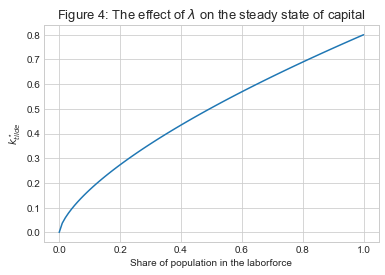

In [366]:
lam_plot = np.linspace(0,1,100)
kss_plot = (lam_plot**(1-alpha)*s/(delta+g*n+g+n))**1/(1-alpha)

#Plotting different value of lambda from 0 to 1 against the value of tecnolegy adjusted capital steady state
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Share of population in the laborforce")
ax.set_ylabel("$k_{tilde}^\star$")

ax.set_title('Figure 4: The effect of $\lambda$ on the steady state of capital', fontsize=13)
ax.plot(lam_plot,kss_plot)
plt.show;

We find that a higher value of $\lambda$ also increases technologically adjusted capital pr. capita. 

We combine this with different values for the populations growth:

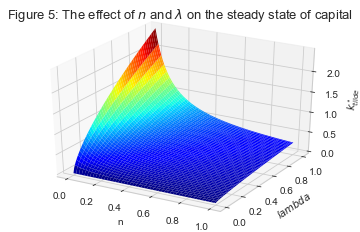

In [365]:
def kss_plot(lam,n,alpha=1/3,delta=0.1,g=0.02,s=0.2):
    ksteady = (lam**(1-alpha)*s/(delta+g*n+g+n))**1/(1-alpha)
    return ksteady

n_plot = np.linspace(0,1,100)
lam_plot = np.linspace(0,1,100)
x1_values_alt,x2_values_alt = np.meshgrid(lam_plot,n_plot,indexing='ij')
u_values_alt = kss_plot(x1_values_alt,x2_values_alt,alpha=1/3,delta=0.1,g=0.02,s=0.2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x2_values_alt,x1_values_alt,u_values_alt,cmap=cm.jet)
ax.set_xlabel("n")
ax.set_ylabel("$lambda$")
ax.set_zlabel("$k_{tilde}^\star$")

ax.set_title('Figure 5: The effect of $n$ and $\lambda$ on the steady state of capital', fontsize=13);

As we expected the highest level of technologically adjusted capital pr. capita is found with a high level og $\lambda$ and no population growth. Since we look at the capital pr. capita an increase in the population will result in more pepole to "share" the capital with. 

# Conclusion

The conclusion of this project is that a higher share of workers will result in a higher level of capital in steady state. In steady state we find a 1:1 relationship between an incease in $\lambda$ and the output pr. capita of the economy. This applies to both an economy with a fixed level of technology and an economy with an increasing development of technology over time. The difference is however, that an economy with a fixed level of technology will see a larger positive effect on capital pr. capita than an economy with an increasing development of technology will see on technologically adjusted capital pr. capita. This is primarily because of the fact that the level of technology is adjusted. 

Thus if an economy is in a crisis where they have problems with a decreasing level of productivity which leads to no economic growth, a possible solution to this could be to raise the supply of labor. The supply of labor could be increased through lower taxation on income or if the unemployment benefits were lowered. 